In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 30.0 MB/s 
     |████████████████████████████████| 636 kB 52.9 MB/s 
     |████████████████████████████████| 895 kB 49.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import random
import numpy as np

seed_val = 42 # 隨機數種子

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
import pandas as pd

df1 = pd.read_pickle('/content/neg_train_0.pkl')
df1.drop(columns=['Id','year'],inplace=True)
df1['label']=0
df2 = pd.read_pickle('/content/pos_train.pkl')
df2.drop(columns=['year'],inplace=True)
df2['label']=1
df = pd.concat([df1,df2])

print('Number of training sentences: {:,}\n'.format(df.shape[0]))

sentences = df.abst.values  #把 Dataframe 轉成 2D numpy array
labels = df.label.values

Number of training sentences: 1,440



In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
#切資料
from sklearn.model_selection import StratifiedKFold
X_train, X_val, y_train, y_val = [],[],[],[]
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(sentences,labels):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train.append(sentences[train_index])
  X_val.append(sentences[test_index])
  y_train.append(labels[train_index])
  y_val.append(labels[test_index])

print("sentence_train長度:",len(X_train)," label_train長度:",len(y_train))
print("sentence_val長度:",len(X_val)," label_val長度:",len(y_val))


TRAIN: [ 144  145  146 ... 1437 1438 1439] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 8

In [ ]:
X_train

[array(['Of the 28 presently known Drosophila tumor suppressor genes we present the status of the functional analysis of the following three genes: (a) lethal (3) malignant brain tumor [1(3)mbt], which by homology belongs to the Pc-G gene family and may be involved in the stable silencing of specific developmental genes by changing the chromatin structure, and thus establishing and maintaining the differentiated state; (b) lethal (3) malignant blood neoplasm-1 [1(3)mbn-1], for whose function only vague predictions can be made; 4) benign (2) gonial cell neoplasm [b(2)gcn], which may function as a splice factor. Each Drosophila tumor suppressor gene transforms in the homozygously mutated state either one or two specific cell-types in a single step, and is thus the primary cause for tumorigenesis. For one of the genes a putative human homologue has been found.',
        "The major intrinsic protein (MIP) of the vertebrate eye lens is the first identified member of a sequence-related famil

In [ ]:
'''
max_len1,max_len2 = 0,0

for sent in X_train:
    input_ids1 = tokenizer.encode(sent, add_special_tokens=True)
    max_len1 = max(max_len1, len(input_ids1))
for sent in X_val:
    input_ids2 = tokenizer.encode(sent, add_special_tokens=True)
    max_len2 = max(max_len2, len(input_ids2))
print('Max sentence length(train): ', max_len1)
print('Max sentence length(val): ', max_len2)
'''

In [ ]:
#tokenize
input_ids_train,attention_masks_train =[],[]
input_ids_val,attention_masks_val = [],[]
for X_t in X_train:
  input_ids_train_list,attention_masks_train_list = [],[] 
  for sent in X_t:
    encoded_dict = tokenizer.encode_plus(sent,add_special_tokens = True, max_length = 512, pad_to_max_length = True,return_attention_mask = True, return_tensors = 'pt', )
    input_ids_train_list.append(encoded_dict['input_ids'])
    attention_masks_train_list.append(encoded_dict['attention_mask'])
  input_ids_train_list = torch.cat(input_ids_train_list, dim=0)
  attention_masks_train_list = torch.cat(attention_masks_train_list, dim=0)
  labels_train = torch.tensor(y_train)
  input_ids_train.append(input_ids_train_list)
  attention_masks_train.append(attention_masks_train_list)
  
for X_v in X_val:
  input_ids_val_list,attention_masks_val_list = [],[]
  for sent in X_v:
    encoded_dict = tokenizer.encode_plus(sent,add_special_tokens = True, max_length = 512, pad_to_max_length = True,return_attention_mask = True, return_tensors = 'pt', )
    input_ids_val_list.append(encoded_dict['input_ids'])
    attention_masks_val_list.append(encoded_dict['attention_mask'])
  input_ids_val_list = torch.cat(input_ids_val_list, dim=0)
  attention_masks_val_list = torch.cat(attention_masks_val_list, dim=0)
  labels_val = torch.tensor(y_val)
  input_ids_val.append(input_ids_val_list)
  attention_masks_val.append(attention_masks_val_list)
  

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
len(input_ids_train)

5

In [ ]:
input_ids_train[0]

tensor([[  101,  1104,  1103,  ...,     0,     0,     0],
        [  101,  1103,  1558,  ...,     0,     0,     0],
        [  101,  4544,  1104,  ...,     0,     0,     0],
        ...,
        [  101, 17351,  1707,  ...,     0,     0,     0],
        [  101,  1107,   173,  ...,     0,     0,     0],
        [  101,  3582,   131,  ...,     0,     0,     0]])

In [ ]:
labels_val

tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]])

In [ ]:
attention_masks_val

[tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]), tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0,

In [ ]:
#定義參數

import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
#train
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, AdamW, BertConfig

torch.cuda.empty_cache()
epochs = 4
training_stats = []
#train_loss,val_loss,val_accuracy = [],[],[]

total_t0 = time.time()
for data in range(len(input_ids_train)):
  model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.1",num_labels = 2,output_attentions = False,output_hidden_states = False,)
  model.cuda()

  train_dataset = TensorDataset(input_ids_train[data], attention_masks_train[data], labels_train[data])
  val_dataset = TensorDataset(input_ids_val[data], attention_masks_val[data], labels_val[data])
  batch_size = 8 
  train_dataloader = DataLoader(train_dataset,sampler = RandomSampler(train_dataset),batch_size = batch_size)
  validation_dataloader = DataLoader(val_dataset,sampler = SequentialSampler(val_dataset),batch_size = batch_size)

  optimizer = AdamW(model.parameters(),lr = 2e-5,eps = 1e-8)
  total_steps = len(train_dataloader) * epochs
  scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps = 0,num_training_steps = total_steps)

  train_loss_list,val_loss_list,val_accuracy_list,training_stats_list = [],[],[],[]

  for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time() 
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
      if step % 40 == 0 and not step == 0:
          elapsed = format_time(time.time() - t0)
          print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed)) 
      b_input_ids = batch[0].to(device)
      b_input_mask = batch[1].to(device)
      b_labels = batch[2].to(device)
      model.zero_grad()        
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels) 
      loss = output[0]
      logits = output[1] 
      total_train_loss += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()
      scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)                 
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:         
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():        
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask,labels=b_labels)            
        loss = outputs[0]
        logits = outputs[1]
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)   
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader)   
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    #train_loss_list.append(avg_train_loss)
    #val_accuracy_list.append(avg_val_accuracy)
    #val_loss_list.append(avg_val_loss)
    training_stats_list.append({'epoch': epoch_i + 1,'Training Loss': avg_train_loss,'Valid. Loss': avg_val_loss,'Valid. Accur.': avg_val_accuracy,'Training Time': training_time,'Validation Time': validation_time})
  training_stats.append(training_stats_list)

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 4 ========
Training...
  Batch    40  of    144.    Elapsed: 0:01:01.
  Batch    80  of    144.    Elapsed: 0:02:03.
  Batch   120  of    144.    Elapsed: 0:03:04.

  Average training loss: 0.08
  Training epcoh took: 0:03:41

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.25
  Validation took: 0:00:20

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    144.    Elapsed: 0:01:01.
  Batch    80  of    144.    Elapsed: 0:02:03.
  Batch   120  of    144.    Elapsed: 0:03:04.

  Average training loss: 0.03
  Training epcoh took: 0:03:41

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.33
  Validation took: 0:00:20

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    144.    Elapsed: 0:01:01.
  Batch    80  of    144.    Elapsed: 0:02:03.
  Batch   120  of    144.    Elapsed: 0:03:04.

  Average training loss: 0.01
  Training epcoh took: 0:03:41

Running Validation...
  Accuracy: 0.97
  Validation Loss: 0.21
  Validation too

KeyboardInterrupt: ignored

In [ ]:
#訓練總結
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.07,0.39,0.88,0:02:26,0:00:06
2,0.07,0.39,0.88,0:02:25,0:00:06
3,0.07,0.39,0.88,0:02:25,0:00:06
4,0.07,0.39,0.88,0:02:24,0:00:06


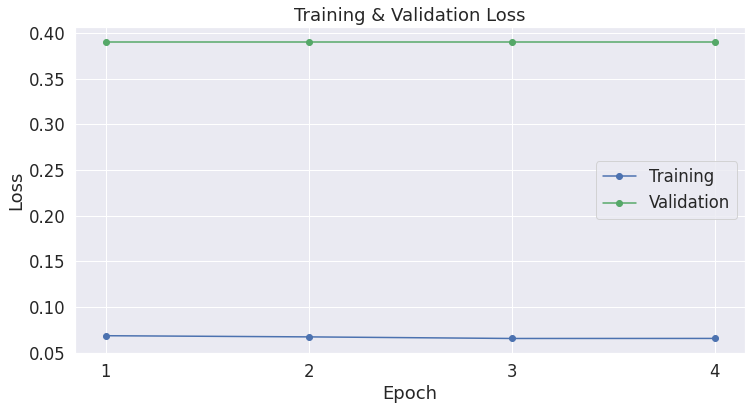

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
!nvidia-smi

Tue Jul 27 11:31:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W /  70W |  15102MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
"""
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0) #文章未到512，防止機器覺得有意義(避免在 padding 的 token 上计算 attention)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
"""

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  A new locus in Drosophila melanogaster that is required for the correct expression of segmental identity has been discovered. The new locus, termed polyhomeotic (ph), is X-linked and maps cytologically to bands 2D2-3. Homozygous ph flies have homeotic transformations similar to those of known dominant gain of function mutants in the Antennapedia and bithorax complexes (ANT-C, BX-C), and in addition show loss of the humerus. ph interacts with three other similar mutations: Polycomb (Pc), Polycomblike (Pcl), and extra sex comb (esc), and acts as a dominant enhancer of Pc. The expression of ph depends on the ANT-C and BX-C dosage. ph has no embryonic phenotype, but temperature shift studies on ph2 show that the ph+ product is required during embryogenesis and larval development. We propose that ph mutants in some way disrupt the normal expression of the ANT-C and BX-C, and, therefore, that ph+ is needed for maintenance of segmental identity.
Token IDs: tensor([  101,   170,  12

In [ ]:
from torch.utils.data import TensorDataset, random_split
from sklearn.model_selection import StratifiedKFold
"""
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16 #我們數據集太大  計算梯度所需的樣本數量，太小會導致效率低下，無法收斂。太大會導致記憶體撐不住

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
"""

TypeError: ignored

In [ ]:
'''
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)
batch_size = 8 
train_dataloader = DataLoader(train_dataset,sampler = RandomSampler(train_dataset),batch_size = batch_size)
validation_dataloader = DataLoader(val_dataset,sampler = SequentialSampler(val_dataset),batch_size = batch_size)
'''

In [ ]:
'''
import torch
torch.cuda.empty_cache()

training_stats = []

total_t0 = time.time()
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time() 
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed)) 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels) 
        loss = output[0]
        logits = output[1] 
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)                
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:         
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():        
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask,labels=b_labels)            
        loss = outputs[0]
        logits = outputs[1]
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
'''


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    160.    Elapsed: 0:00:38.
  Batch    80  of    160.    Elapsed: 0:01:14.
  Batch   120  of    160.    Elapsed: 0:01:50.

  Average training loss: 0.07
  Training epcoh took: 0:02:26

Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.39
  Validation took: 0:00:06

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    160.    Elapsed: 0:00:36.
  Batch    80  of    160.    Elapsed: 0:01:12.
  Batch   120  of    160.    Elapsed: 0:01:48.

  Average training loss: 0.07
  Training epcoh took: 0:02:25

Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.39
  Validation took: 0:00:06

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    160.    Elapsed: 0:00:36.
  Batch    80  of    160.    Elapsed: 0:01:12.
  Batch   120  of    160.    Elapsed: 0:01:49.

  Average training loss: 0.07
  Training epcoh took: 0:02:25

Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.39
  Validation too

In [ ]:
'''
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "dmis-lab/biobert-base-cased-v1.1", # Use the 12-layer BERT model, with an uncased vocab. #改字biobert
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()
'''

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
'''

from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4 #代表樣本集內所有的資料經過了一次訓練。每個 epoch 都會進行shuffle，對要輸入的資料進行重新排序，分成不同的batch。

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
'''




In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (